<a href="https://colab.research.google.com/github/neeluvermaiitj/Deep-Learning/blob/main/Handwritten_digit_classification_using_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question**


Please go through the following blog to learn how to recognize handwritten digits using
Neural Network. Here Neural Network is coded using PyTorch Library in Python.
https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627
Use above code and report your observation based on the following:(10 points)

(i) Change loss function,

(ii) Change in learning rate, and

(iii) Change in Number of hidden layers

# Importing the modules

Importing all the modules 

In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

# Neural Network

Here we are making few function which we are going to use later while training:

`get_nn_model()` - This function takes no. of hidden layers as input and returns the `pytorch nn` object with respective no. of hidden layers

`get_criterion()` - This takes sets the respective loss function for the neural network 

`fit()` - This performs the training 

`model_accuracy()` - This computs the acccuracy of the model





In [ ]:
def get_nn_model(hidden_sizes):
    if len(hidden_sizes) == 2:
        model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                            nn.ReLU(),
                            nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                            nn.ReLU(),
                            nn.Linear(hidden_sizes[1], output_size),
                            nn.LogSoftmax(dim=1))
    elif len(hidden_sizes) == 3:
        model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                    nn.ReLU(),
                    nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                    nn.ReLU(),
                    nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                    nn.ReLU(),                              
                    nn.Linear(hidden_sizes[2], output_size),
                    nn.LogSoftmax(dim=1))
    elif len(hidden_sizes) == 4:
        model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                    nn.ReLU(),
                    nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                    nn.ReLU(),
                    nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                    nn.ReLU(),     
                    nn.Linear(hidden_sizes[2], hidden_sizes[3]),
                    nn.ReLU(),  
                    nn.Linear(hidden_sizes[3], output_size),
                    nn.LogSoftmax(dim=1))
        
    return model

def get_criterion(l):

    if l == "NLLLoss":
        criterion = nn.NLLLoss()
    elif l == "MSELoss":
        criterion = nn.MSELoss()
    elif l == "SmoothL1Loss":
        criterion = nn.SmoothL1Loss()
    elif l == "CrossEntropyLoss":
        criterion = nn.CrossEntropyLoss()
    elif l == "KLDivLoss":
        criterion = nn.KLDivLoss()
    
    return criterion

def fit(model, lr, criterion):

    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    time0 = time()
    epochs = 15       # Change it to 15 for the final run
    loss_history = dict()

    for e in range(epochs):
        running_loss = 0
        for images, labels in trainloader:
            # Flatten MNIST images into a 784 long vector
            images = images.view(images.shape[0], -1)
        
            # Training pass
            optimizer.zero_grad()
            
            output = model(images)
            loss = criterion(output, labels)
            
            #This is where the model learns by backpropagating
            loss.backward()
            
            #And optimizes its weights here
            optimizer.step()
            
            running_loss += loss.item()
        else:
            loss_history[e] = running_loss/len(trainloader)
            print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))

    total_time_for_training = (time()-time0)/60

    print("\nTraining Time (in minutes) =",total_time_for_training)

    return model, total_time_for_training, loss_history

def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

def validation_one_sample(valloader, model):

    images, labels = next(iter(valloader))

    img = images[0].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    print("Predicted Digit =", probab.index(max(probab)))
    view_classify(img.view(1, 28, 28), ps)

def model_accuracy(valloader, model):

    correct_count, all_count = 0, 0
    for images,labels in valloader:
        for i in range(len(labels)):
            img = images[i].view(1, 784)
            with torch.no_grad():
                logps = model(img)
                
            ps = torch.exp(logps)
            probab = list(ps.numpy()[0])
            pred_label = probab.index(max(probab))
            true_label = labels.numpy()[i]
            if(true_label == pred_label):
                correct_count += 1
            all_count += 1

    acc = correct_count/all_count

#     print("Number Of Images Tested =", all_count)
#     print(f"Model Accuracy = {acc}")

    return acc



# Loading the dataset


Here we are loading the `MNIST` dataset from `torchvision.datasets` 

In [ ]:
T = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

trainset = datasets.MNIST('train_data', download=True, train=True, transform=T)
valset = datasets.MNIST('test_data', download=True, train=False, transform=T)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

Extracting train_data/MNIST/raw/train-images-idx3-ubyte.gz to train_data/MNIST/raw


Extracting train_data/MNIST/raw/train-labels-idx1-ubyte.gz to train_data/MNIST/raw


Extracting train_data/MNIST/raw/t10k-images-idx3-ubyte.gz to train_data/MNIST/raw


Extracting train_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to train_data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting test_data/MNIST/raw/train-images-idx3-ubyte.gz to test_data/MNIST/raw


Extracting test_data/MNIST/raw/train-labels-idx1-ubyte.gz to test_data/MNIST/raw


Extracting test_data/MNIST/raw/t10k-images-idx3-ubyte.gz to test_data/MNIST/raw


Extracting test_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to test_data/MNIST/raw
Processing...
Done!


# (i) Change `loss function`

### *Model Training*

We are changing loss function and check the performance of the model for comparison, we are going to try

 [`"NLLLoss", "CrossEntropyLoss"`] 

In [ ]:
loss_funcs = ["NLLLoss", "CrossEntropyLoss"]

In [ ]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10
lr = 0.003

In [ ]:
prams  = {"total_time_for_training": None,
          "loss_history": None,
          "accuracy": None}

final_result_loss = {i: prams.copy() for i in loss_funcs}

for c in loss_funcs:
    
    print(f"For Loss Function : {c}")
    print("************************************************************")
    model = get_nn_model(hidden_sizes)
    criterion = get_criterion(c)
    model, total_time_for_training, loss_history = fit(model, lr, criterion)
    accuracy = model_accuracy(valloader, model)
    print("************************************************************")
    print(f"Model Accuracy = {accuracy}")


    final_result_loss[c]["total_time_for_training"] = total_time_for_training
    final_result_loss[c]["loss_history"] = loss_history
    final_result_loss[c]["accuracy"] = accuracy
    print("************************************************************")


For Loss Function : NLLLoss
************************************************************
Epoch 0 - Training loss: 0.620967006775489


### *Model Performance Chart with respect to different `loss functions`*

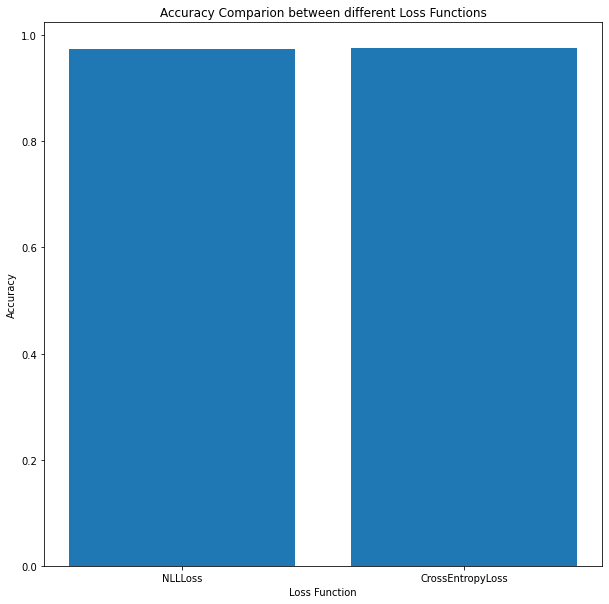

In [ ]:
plt.figure(figsize=(10,10))
loss_func = list(final_result_loss.keys())
accuracy = [final_result_loss[i]["accuracy"] for i in final_result_loss]
plt.bar(loss_func,accuracy, align='center')
plt.title("Accuracy Comparion between different Loss Functions")
plt.xlabel("Loss Function")
plt.ylabel("Accuracy")
plt.show()

### *Conclusion*

So, we can conclude that we dont see much difference between `NLLLoss` and `CrossEntropyLoss` in this case as the accuracy is almost same 

# (ii) Change in `learning rate`

### *Model Training*

We are changing learning rate and check the performance of the model for comparison, we are going to try

[`0.003`, `0.001`, `0.01`, `0.1`]

In [ ]:
learning_rates = [0.003, 0.001, 0.01, 0.1]

In [ ]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10
loss_func = "NLLLoss"

In [ ]:
prams  = {"total_time_for_training": None,
          "loss_history": None,
          "accuracy": None}

final_result_lr = {i: prams.copy() for i in learning_rates}

for lr in learning_rates:
    
    print(f"With Learning Rate : {lr}")
    print("************************************************************")
    model = get_nn_model(hidden_sizes)
    criterion = get_criterion(loss_func)
    model, total_time_for_training, loss_history = fit(model, lr, criterion)
    accuracy = model_accuracy(valloader, model)
    print("************************************************************")
    print(f"Model Accuracy = {accuracy}")


    final_result_lr[lr]["total_time_for_training"] = total_time_for_training
    final_result_lr[lr]["loss_history"] = loss_history
    final_result_lr[lr]["accuracy"] = accuracy
    print("************************************************************")


With Learning Rate : 0.003
************************************************************
Epoch 0 - Training loss: 0.6369445313776988
Epoch 1 - Training loss: 0.27916013808456314
Epoch 2 - Training loss: 0.21821103636215108
Epoch 3 - Training loss: 0.17653551507892132
Epoch 4 - Training loss: 0.14942852815966617
Epoch 5 - Training loss: 0.12976469424094506
Epoch 6 - Training loss: 0.11411274559517849
Epoch 7 - Training loss: 0.10117376904521606
Epoch 8 - Training loss: 0.09062673013581872
Epoch 9 - Training loss: 0.08182383197715193
Epoch 10 - Training loss: 0.07541089907868394
Epoch 11 - Training loss: 0.06670111606020664
Epoch 12 - Training loss: 0.0626553771580492
Epoch 13 - Training loss: 0.05784159070521252
Epoch 14 - Training loss: 0.05325065495154417

Training Time (in minutes) = 2.5173097888628644
************************************************************
Model Accuracy = 0.9749
************************************************************
With Learning Rate : 0.001
************

### *Model Performance Chart with respect to different `learning rates`*

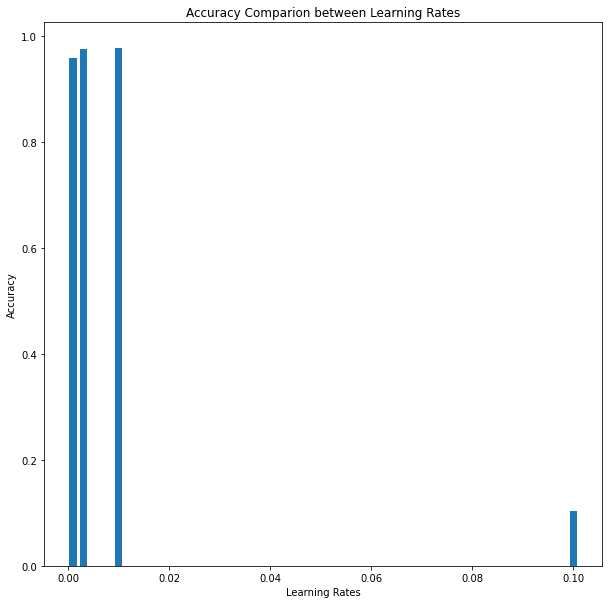

In [ ]:
plt.figure(figsize=(10,10))
lrs = list(final_result_lr.keys())
accuracy = [final_result_lr[i]["accuracy"] for i in final_result_lr]
plt.bar(lrs,accuracy, align='center', width=(lrs[1]-lrs[0])*.7)
plt.title("Accuracy Comparion between Learning Rates")
plt.xlabel("Learning Rates")
plt.ylabel("Accuracy")
plt.show()

### *Conclusion*

So, we can conclude that the model performs better when the learning rate is small, which is obvious. If the learning rate is large, then it will take large step and the gradient descent will be fast, but we might fail to reach the global minimum and become stuck at a local minimum. So,
the learning rate should be chosen optimally and preferably small. Although very small, might take more time to converge and would need more epochs, so we need to callibrate the learning rate, w.r.t to the problem set and need to experiment a bit. 

Like in this problem, `learning rate` of around `0.01` performed well

# (iii) Change in Number of `hidden layers`


### *Model Training*

We are changing no. of hidden layers and check the performance of the model for comparison, we are going to try with `2, 3 and 4` hidden layers



In [ ]:
no_hidden_layers = {2: [128, 64],
                    3: [128, 64, 32],
                    4: [128, 64, 32, 16]}

In [ ]:
input_size = 784
output_size = 10
loss_func = "NLLLoss"
lr = 0.003

In [ ]:
prams  = {"total_time_for_training": None,
          "loss_history": None,
          "accuracy": None}

final_result_h_layer = {i: prams.copy() for i in no_hidden_layers.keys()}

for hl in no_hidden_layers.keys():
    
    print(f"With {hl} no. of Hidden Layers, having {no_hidden_layers[hl]} neurons respectively")
    print("***********************************************************************")
    model = get_nn_model(no_hidden_layers[hl])
    criterion = get_criterion(loss_func)
    model, total_time_for_training, loss_history = fit(model, lr, criterion)
    accuracy = model_accuracy(valloader, model)
    print("***********************************************************************")
    print(f"Model Accuracy = {accuracy}")


    final_result_h_layer[hl]["total_time_for_training"] = total_time_for_training
    final_result_h_layer[hl]["loss_history"] = loss_history
    final_result_h_layer[hl]["accuracy"] = accuracy
    print("***********************************************************************")


With 2 no. of Hidden Layers, having [128, 64] neurons respectively
***********************************************************************
Epoch 0 - Training loss: 0.6342693597777311
Epoch 1 - Training loss: 0.28277023827661074
Epoch 2 - Training loss: 0.217228022396072
Epoch 3 - Training loss: 0.17447901809258437
Epoch 4 - Training loss: 0.14378185920329936
Epoch 5 - Training loss: 0.12350368756912093
Epoch 6 - Training loss: 0.10675326360663626
Epoch 7 - Training loss: 0.09480257369260163
Epoch 8 - Training loss: 0.08494955599695238
Epoch 9 - Training loss: 0.07673131938038795
Epoch 10 - Training loss: 0.07027431730496715
Epoch 11 - Training loss: 0.0639066180538958
Epoch 12 - Training loss: 0.05877614974492053
Epoch 13 - Training loss: 0.05391770019195974
Epoch 14 - Training loss: 0.05010472936456455

Training Time (in minutes) = 2.5153718113899233
***********************************************************************
Model Accuracy = 0.9746
****************************************

### *Model Performance Chart with respect to different `hidden layers`*

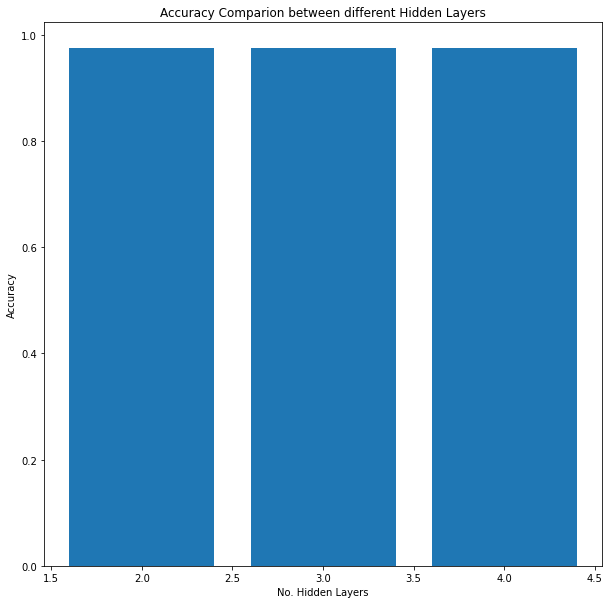

In [ ]:
plt.figure(figsize=(10,10))
hly = list(final_result_h_layer.keys())
accuracy = [final_result_h_layer[i]["accuracy"] for i in final_result_h_layer]
plt.bar(hly,accuracy, align='center')
plt.title("Accuracy Comparion between different Hidden Layers")
plt.xlabel("No. Hidden Layers")
plt.ylabel("Accuracy")
plt.show()

### *Conclusion*

For this problem set, we didnt see any difference w.r.t no. of hidden layers as such, although no. of hidden layers and no. of neurons in each hidden layers are important parameters to look for while training any NN, and subject to experiments and experience. We did not try different combinations but with the few different combinations we tested as above, we do not see much of a different in model performance